In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv('gfp_folding.csv')
df

,t_ref,V_ref,t_unf,V_unf
0,-312.500000,0.021321,-78.125000,0.616515
1,-312.421875,0.118316,-78.105469,1.166263
2,-312.343750,0.123742,-78.085938,1.166602
3,-312.265625,0.121368,-78.066406,1.164228
4,-312.187500,0.118655,-78.046875,1.165585
...,...,...,...,...
7262,254.843750,0.558182,NaN,NaN
7263,254.921875,0.559200,NaN,NaN
7264,255.000000,0.560217,NaN,NaN
7265,255.078125,0.559539,NaN,NaN


-304.921875 0.559877933


C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/1919916487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Time'] = df_ref['t_ref'] - dT
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/1919916487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Voltage'] = df_ref['V_ref'] - dV


<Figure size 432x288 with 0 Axes>

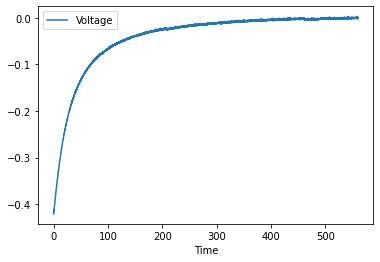

In [14]:
df_ref = df.query('-305 < t_ref ')
dT = df_ref.iloc[0]['t_ref']
dV = df_ref.iloc[-1]['V_ref']
df_ref['Time'] = df_ref['t_ref'] - dT

df_ref['Voltage'] = df_ref['V_ref'] - dV
print(dT,dV)
plt.figure()
df_ref.plot('Time', 'Voltage')
#plt.yscale('log')
plt.show()

In [15]:
g_1 = lambda t,a,tau_1: a*np.exp(-t/tau_1)
p0 = [-0.4, 60]
popt, pcov = curve_fit(g_1, df_ref['Time'], df_ref['Voltage'], p0=p0)
a = popt[0]
tau_1 = popt[1]
da = np.sqrt(pcov[0][0])
dtau_1 = np.sqrt(pcov[1][1])
print(a, da)
print(tau_1, dtau_1)

-0.3626188760612792 0.0007842478067889656
57.05274875349111 0.17462253101994912


C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/1764713699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting'] = g_1(df_ref['Time'], a, tau_1)
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/1764713699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual'] = df_ref['Voltage'] - df_ref['Fitting']


<Figure size 432x288 with 0 Axes>

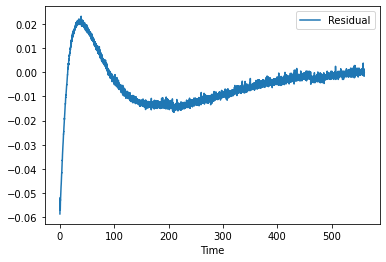

In [16]:
df_ref['Fitting'] = g_1(df_ref['Time'], a, tau_1)
df_ref['Residual'] = df_ref['Voltage'] - df_ref['Fitting']
plt.figure()
df_ref.plot('Time', 'Residual')
plt.show()

-0.1491566286768588 0.00030093646609739724
-0.27073125725560004 0.000278407389048124
112.4375598478172 0.14981239245216593
24.922740219012088 0.038629117943229915


<Figure size 432x288 with 0 Axes>

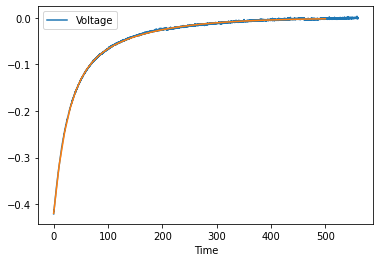

In [17]:
g_2 = lambda t, a_1, a_2, tau_1, tau_2: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2)
p0 = [-0.1,-0.1,60,10]
popt, pcov = curve_fit(g_2, df_ref['Time'], df_ref['Voltage'],p0=p0)
a_1 = popt[0]
a_2 = popt[1]
tau_1 = popt[2]
tau_2 = popt[3]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
dtau_1 = np.sqrt(pcov[2][2])
dtau_2 = np.sqrt(pcov[3][3])
print(a_1, da_1)
print(a_2, da_2)
print(tau_1, dtau_1)
print(tau_2, dtau_2)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_2(X,a_1, a_2, tau_1, tau_2))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/663341705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting_2'] = g_2(df_ref['Time'], a_1, a_2, tau_1, tau_2)
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/663341705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual_2'] = df_ref['Voltage'] - df_ref['Fitting_2']


<Figure size 432x288 with 0 Axes>

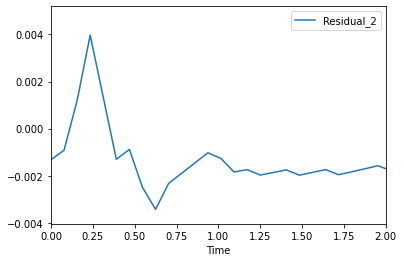

In [20]:
df_ref['Fitting_2'] = g_2(df_ref['Time'], a_1, a_2, tau_1, tau_2)
df_ref['Residual_2'] = df_ref['Voltage'] - df_ref['Fitting_2']
plt.figure()
df_ref.plot('Time', 'Residual_2')
plt.xlim(0,2)
plt.show()

-0.13322297143492848 0.0008039238796457413
-0.08256744438575998 0.0074148561124389575
-0.20769084361782508 0.0068513100669807874
118.51696643093086 0.32268434764468146
15.368940187047443 0.5199316213451701
31.45883036030674 0.5264016849101012


<Figure size 432x288 with 0 Axes>

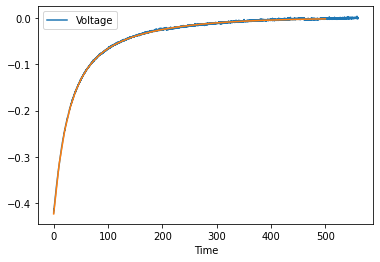

In [21]:
g_3 = lambda t, a_1, a_2, a_3, tau_1, tau_2, tau_3: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2) + a_3*np.exp(-t/tau_3)
p1 = [-0.1,-0.1, -0.1, 100, 10, 10]
popt, pcov = curve_fit(g_3, df_ref['Time'], df_ref['Voltage'],p0=p1)
a_1 = popt[0]
a_2 = popt[1]
a_3 = popt[2]
tau_1 = popt[3]
tau_2 = popt[4]
tau_3 = popt[5]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
da_3 = np.sqrt(pcov[2][2])
dtau_1 = np.sqrt(pcov[3][3])
dtau_2 = np.sqrt(pcov[4][4])
dtau_3 = np.sqrt(pcov[5][5])
print(a_1, da_1)
print(a_2, da_2)
print(a_3, da_3)
print(tau_1, dtau_1)
print(tau_2, dtau_2)
print(tau_3, dtau_3)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_3(X,a_1, a_2, a_3, tau_1, tau_2, tau_3))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/4215207243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting_3'] = g_3(df_ref['Time'], a_1, a_2, a_3, tau_1, tau_2, tau_3)
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/4215207243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual_3'] = df_ref['Voltage'] - df_ref['Fitting_3']


<Figure size 432x288 with 0 Axes>

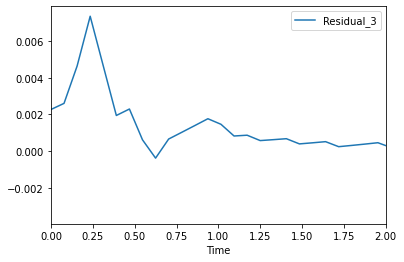

In [22]:
df_ref['Fitting_3'] = g_3(df_ref['Time'], a_1, a_2, a_3, tau_1, tau_2, tau_3)
df_ref['Residual_3'] = df_ref['Voltage'] - df_ref['Fitting_3']
plt.figure()
df_ref.plot('Time', 'Residual_3')
plt.xlim(0,2)
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/438942014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['absVoltage'] = np.abs(df_ref['Voltage'])
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/438942014.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['absFitting_1'] = np.abs(df_ref['Fitting'])
C:\Users\shun-\AppData\Local\Temp/ipykernel_8140/438942014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

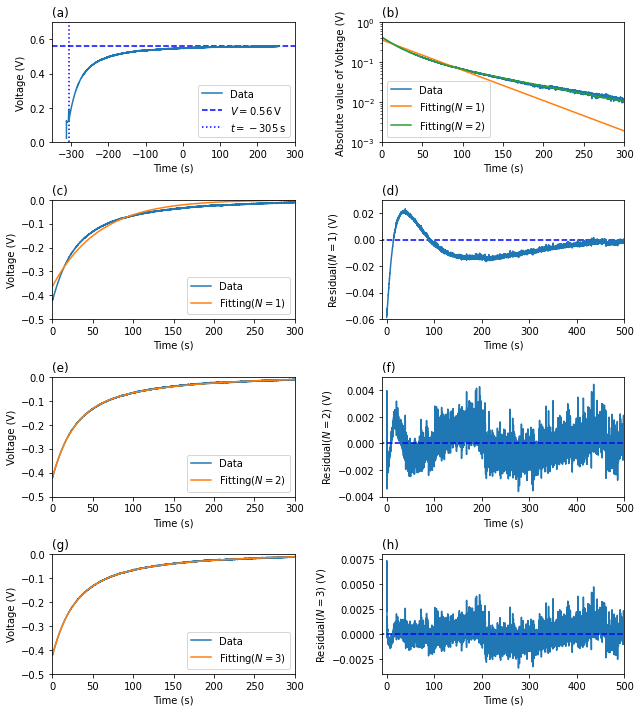

In [9]:
fig, axes = plt.subplots(4,2,tight_layout=True,figsize=(9,10))
df.plot('t_ref', 'V_ref', ax=axes[0,0], label=r'Data')
axes[0,0].hlines(0.56,-350,300, linestyle='dashed', color='b', label=r'$V = 0.56\,$V')
axes[0,0].vlines(-305,0,1, linestyle='dotted', color='b', label=r'$t = -305\,$s')
axes[0,0].set_xlim(-350,300)
axes[0,0].set_ylim(0,0.7)
axes[0,0].set_title(r'(a)', loc='left')
axes[0,0].set_xlabel(r'Time (s)')
axes[0,0].set_ylabel(r'Voltage (V)')
axes[0,0].legend()

df_ref['absVoltage'] = np.abs(df_ref['Voltage'])
df_ref['absFitting_1'] = np.abs(df_ref['Fitting'])
df_ref['absFitting_2'] = np.abs(df_ref['Fitting_2'])
df_ref['absFitting_3'] = np.abs(df_ref['Fitting_3'])

df_ref.plot('Time','absVoltage', ax=axes[0,1], label=r'Data')
df_ref.plot('Time', 'absFitting_1', ax=axes[0,1], label=r'Fitting($N=1$)')
df_ref.plot('Time', 'absFitting_2', ax=axes[0,1], label=r'Fitting($N=2$)')
#df_ref.plot('Time', 'absFitting_3', ax=axes[0,1], label=r'Fitting_3')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim(0,300)
axes[0,1].set_ylim(0.001,1)
axes[0,1].set_title(r'(b)', loc='left')
axes[0,1].set_xlabel(r'Time (s)')
axes[0,1].set_ylabel(r'Absolute value of Voltage (V)')
axes[0,1].legend()

df_ref.plot('Time', 'Voltage', ax=axes[1,0], label=r'Data')
df_ref.plot('Time', 'Fitting', ax=axes[1,0], label=r'Fitting($N=1$)')
axes[1,0].set_xlim(0,300)
axes[1,0].set_ylim(-0.5,0)
axes[1,0].set_title(r'(c)', loc='left')
axes[1,0].set_xlabel(r'Time (s)')
axes[1,0].set_ylabel(r'Voltage (V)')
axes[1,0].legend()

df_ref.plot('Time', 'Voltage', ax=axes[2,0], label=r'Data')
df_ref.plot('Time', 'Fitting_2', ax=axes[2,0], label=r'Fitting($N=2$)')
axes[2,0].set_xlim(0,300)
axes[2,0].set_ylim(-0.5,0)
axes[2,0].set_title(r'(e)', loc='left')
axes[2,0].set_xlabel(r'Time (s)')
axes[2,0].set_ylabel(r'Voltage (V)')
axes[2,0].legend()

df_ref.plot('Time', 'Voltage', ax=axes[3,0], label=r'Data')
df_ref.plot('Time', 'Fitting_3', ax=axes[3,0], label=r'Fitting($N=3$)')
axes[3,0].set_xlim(0,300)
axes[3,0].set_ylim(-0.5,0)
axes[3,0].set_title(r'(g)', loc='left')
axes[3,0].set_xlabel(r'Time (s)')
axes[3,0].set_ylabel(r'Voltage (V)')
axes[3,0].legend()


df_ref.plot('Time', 'Residual', ax=axes[1,1], legend=False)
axes[1,1].hlines(0,-100,600, linestyle='dashed', color='b')
axes[1,1].set_xlim(-10,500)
axes[1,1].set_ylim(-0.06,0.03)
axes[1,1].set_title(r'(d)', loc='left')
axes[1,1].set_xlabel(r'Time (s)')
axes[1,1].set_ylabel(r'Residual($N=1$) (V)')

df_ref.plot('Time', 'Residual_2', ax=axes[2,1],legend=False, zorder=1)
axes[2,1].hlines(0,-100,600, linestyle='dashed', color='b', zorder=2)
axes[2,1].set_xlim(-10,500)
axes[2,1].set_ylim(-0.004,0.005)
axes[2,1].set_title(r'(f)', loc='left')
axes[2,1].set_xlabel(r'Time (s)')
axes[2,1].set_ylabel(r'Residual($N=2$) (V)')

df_ref.plot('Time', 'Residual_3', ax=axes[3,1],legend=False, zorder=1)
axes[3,1].hlines(0,-100,600, linestyle='dashed', color='b', zorder=2)
axes[3,1].set_xlim(-10,500)
axes[3,1].set_ylim(-0.004,0.008)
axes[3,1].set_title(r'(h)', loc='left')
axes[3,1].set_xlabel(r'Time (s)')
axes[3,1].set_ylabel(r'Residual($N=3$) (V)')

plt.show()

In [10]:
g_4 = lambda t, a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2) + a_3*np.exp(-t/tau_3) + a_4*np.exp(-t/tau_4)
p1 = [-0.1, -0.1, -0.1, -0.01, 150, 80, 10, 0.1]
popt, pcov = curve_fit(g_4, df_ref['Time'], df_ref['Voltage'],p0=p1)
a_1 = popt[0]
a_2 = popt[1]
a_3 = popt[2]
a_4 = popt[3]
tau_1 = popt[4]
tau_2 = popt[5]
tau_3 = popt[6]
tau_4 = popt[7]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
da_3 = np.sqrt(pcov[2][2])
da_4 = np.sqrt(pcov[3][3])
dtau_1 = np.sqrt(pcov[4][4])
dtau_2 = np.sqrt(pcov[5][5])
dtau_3 = np.sqrt(pcov[6][6])
dtau_4 = np.sqrt(pcov[7][7])
print(a_1, da_1)
print(a_2, da_2)
print(a_3, da_3)
print(a_4, da_4)
print(tau_1, dtau_1)
print(tau_2, dtau_2)
print(tau_3, dtau_3)
print(tau_4, dtau_4)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_4(X,a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1800.

C:\Users\shun-\AppData\Local\Temp/ipykernel_6068/497011487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting_4'] = g_4(df_ref['Time'], a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4)
C:\Users\shun-\AppData\Local\Temp/ipykernel_6068/497011487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual_4'] = df_ref['Voltage'] - df_ref['Fitting_4']


<Figure size 432x288 with 0 Axes>

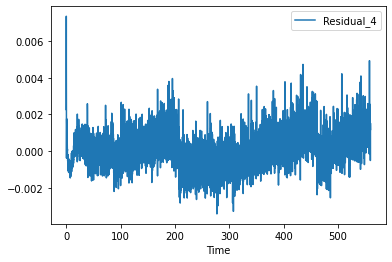

In [ ]:
df_ref['Fitting_4'] = g_4(df_ref['Time'], a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4)
df_ref['Residual_4'] = df_ref['Voltage'] - df_ref['Fitting_4']
plt.figure()
df_ref.plot('Time', 'Residual_4')
plt.show()